<a href="https://colab.research.google.com/github/DewliniHerath/Telco_Churn_Predictor/blob/main/notebooks/Telco_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Preprocessing for Neural Network**

In [2]:
# import libraries
import pandas as pd
import numpy as np
# mount to google drive
from google.colab import drive
drive.mount('/content/drive')
# remove unecessary errors
import warnings, os
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] ='3' # shows only errors
pd.options.mode.chained_assignment = None
# load data
file_path = '/content/drive/MyDrive/ML_Coursework/Telco-Customer-Churn.csv'
telco_df = pd.read_csv(file_path)
telco_df.head()

Mounted at /content/drive


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# dropping customerID (no predictive value)
if "customerID" in telco_df.columns:
    telco_df.drop(columns=["customerID"], inplace=True)
telco_df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# dropping TotalCharges directly (redundant feature plus 11 missing values)
if "TotalCharges" in telco_df.columns:
    telco_df.drop(columns=["TotalCharges"], inplace=True)
telco_df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [5]:
# dropping gender to avoid ethical bias
if "gender"in telco_df.columns:
    telco_df.drop(columns=["gender"], inplace=True)
telco_df.head(5)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


All the columns that are not needed dropped [TotalCharges, customerID, gender] ✅

In [6]:
# handling internet service dependency
service_features = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
for feature in service_features:
  if feature in telco_df.columns:
    telco_df[feature] = telco_df[feature].replace('No internet service','No')

# handling phone service dependency
if 'PhoneService' in telco_df.columns:
  if 'MultipleLines' in telco_df.columns:
      telco_df['MultipleLines'] = telco_df['MultipleLines'].replace('No phone service','No')

In [7]:
# target column  separation
target_col = "Churn"
y = telco_df[target_col].copy()
y = y.map({"Yes": 1, "No": 0})
X = telco_df.drop(columns=[target_col])

In [8]:
# train/test split (stratified)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# class weights
classes = np.array([0,1])
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = {cls: w for cls, w in zip(classes, class_weights)}

In [9]:
# defining feature schema
num_features = ["tenure", "MonthlyCharges"]
cat_features = ["MultipleLines", "InternetService", "Contract", "PaymentMethod", "Dependents", "PhoneService", "PaperlessBilling", "Partner","OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
bin_features = ["SeniorCitizen"]

In [10]:
# one hot encoding and numerical values are standardized using StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# separate target
target_col = 'Churn'
# define transformers
num_transformer = Pipeline(steps=[('scaler', StandardScaler())]) # standardization
bin_transformer = "passthrough" # no processing needed
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False,drop=None))])
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_features), ('bin', bin_transformer, bin_features), ('cat', cat_transformer, cat_features)], remainder='drop')
# fit on train and transform train/test
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
# feature names
cat_encoder = preprocessor.named_transformers_['cat']['onehot']
cat_names = cat_encoder.get_feature_names_out(cat_features).tolist()
feature_names = np.concatenate([num_features, bin_features, cat_names])
# wrap in dataframe
X_train_df = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_df = pd.DataFrame(X_test_processed, columns=feature_names)
print("Train shape:", X_train_df.shape)
print("Test shape:", X_test_df.shape)
print("Feature names:", feature_names)
print("Train target distribution:",y_train.value_counts(normalize=True))
print("Test target distribution:", y_test.value_counts(normalize=True))


Train shape: (5634, 35)
Test shape: (1409, 35)
Feature names: ['tenure' 'MonthlyCharges' 'SeniorCitizen' 'MultipleLines_No'
 'MultipleLines_Yes' 'InternetService_DSL' 'InternetService_Fiber optic'
 'InternetService_No' 'Contract_Month-to-month' 'Contract_One year'
 'Contract_Two year' 'PaymentMethod_Bank transfer (automatic)'
 'PaymentMethod_Credit card (automatic)' 'PaymentMethod_Electronic check'
 'PaymentMethod_Mailed check' 'Dependents_No' 'Dependents_Yes'
 'PhoneService_No' 'PhoneService_Yes' 'PaperlessBilling_No'
 'PaperlessBilling_Yes' 'Partner_No' 'Partner_Yes' 'OnlineSecurity_No'
 'OnlineSecurity_Yes' 'OnlineBackup_No' 'OnlineBackup_Yes'
 'DeviceProtection_No' 'DeviceProtection_Yes' 'TechSupport_No'
 'TechSupport_Yes' 'StreamingTV_No' 'StreamingTV_Yes' 'StreamingMovies_No'
 'StreamingMovies_Yes']
Train target distribution: Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Test target distribution: Churn
0    0.734564
1    0.265436
Name: proportion, dtype: floa

### **Neural Network Model Building and Training**

Epoch 1/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5177 - auc: 0.5570 - loss: 1.9656 - precision: 0.3128 - recall: 0.6016 - val_accuracy: 0.5976 - val_auc: 0.7421 - val_loss: 1.5490 - val_precision: 0.3816 - val_recall: 0.8316 - learning_rate: 3.0000e-04
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5635 - auc: 0.6089 - loss: 1.7607 - precision: 0.3498 - recall: 0.6421 - val_accuracy: 0.6203 - val_auc: 0.7670 - val_loss: 1.4895 - val_precision: 0.3995 - val_recall: 0.8556 - learning_rate: 3.0000e-04
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5779 - auc: 0.6289 - loss: 1.6813 - precision: 0.3640 - recall: 0.6750 - val_accuracy: 0.6430 - val_auc: 0.7840 - val_loss: 1.4211 - val_precision: 0.4150 - val_recall: 0.8422 - learning_rate: 3.0000e-04
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5962 - auc: 0.6619 - loss: 1.5542 - precision: 0.3804 - recall: 0.6953 - val_accuracy: 0.6608 - val_auc: 0.7992 - val_lo

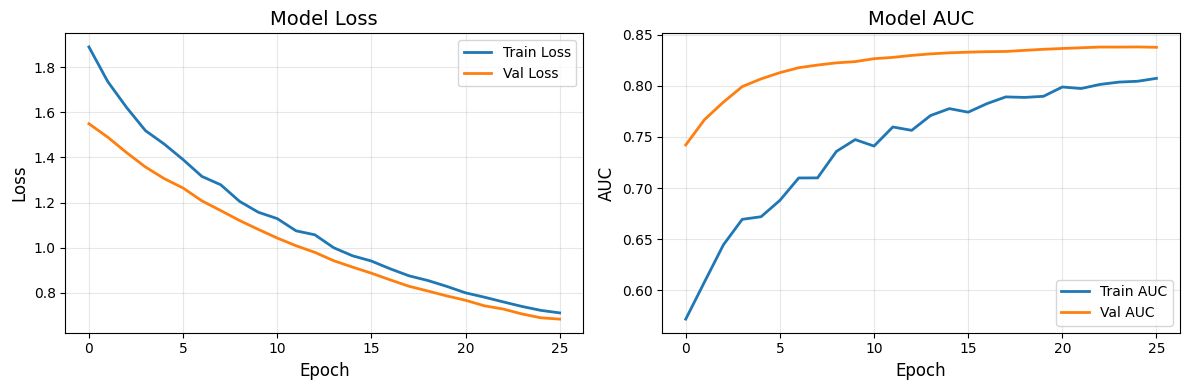

Best epoch: 25
Best validation AUC: 0.8379
Best validation loss: 0.6838
Optimal threshold for predictions: 0.5650


In [11]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, f1_score, precision_score, recall_score
import random
import numpy as np

# setting random seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# model architecture
inputs = keras.Input(shape=(X_train_processed.shape[1],))
x = keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.l2(0.01))(inputs)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.6)(x)

x = keras.layers.Dense(16, activation='relu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.l2(0.01))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.6)(x)

outputs = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=3e-4),
    loss='binary_crossentropy',
    metrics=['accuracy',
             keras.metrics.AUC(name='auc'),
             keras.metrics.Precision(name='precision'),
             keras.metrics.Recall(name='recall')]
)

# earlystopping if the validation AUC doesn't improve for 3 epochs
es = keras.callbacks.EarlyStopping(
    monitor='val_auc',
    patience=3,
    mode='max',
    restore_best_weights=True,
    verbose=1,
    min_delta=0.0001
)
# lowers learning rate helping convergence
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_auc',
    factor=0.5,
    patience=2,
    mode='max',
    min_lr=1e-6,
    verbose=1
)

# training
history = model.fit(
    X_train_processed, y_train,
    validation_data=(X_test_processed, y_test),
    batch_size=32,
    epochs=100,
    class_weight=class_weights_dict,
    callbacks=[es, reduce_lr],
    verbose=1
)

# predictions
y_pred_proba = model.predict(X_test_processed).ravel()

# threshold tuning
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
f1_scores = np.nan_to_num(f1_scores)

optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

# final evaluation
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int) # apply optimal threshold
print(classification_report(y_test, y_pred_optimal, digits=4))
print(confusion_matrix(y_test, y_pred_optimal))
print(f"AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

# training history plots
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Val Loss', linewidth=2)
plt.title('Model Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['auc'], label='Train AUC', linewidth=2)
plt.plot(history.history['val_auc'], label='Val AUC', linewidth=2)
plt.title('Model AUC', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('AUC', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ML_Coursework/overfitting.png')
plt.show()

# training summary
best_epoch = np.argmax(history.history['val_auc'])
print(f"Best epoch: {best_epoch + 1}")
print(f"Best validation AUC: {max(history.history['val_auc']):.4f}")
print(f"Best validation loss: {min(history.history['val_loss']):.4f}")
print(f"Optimal threshold for predictions: {optimal_threshold:.4f}")

### **Visualization [Precision Recall Curve & Confusion Matrix]**

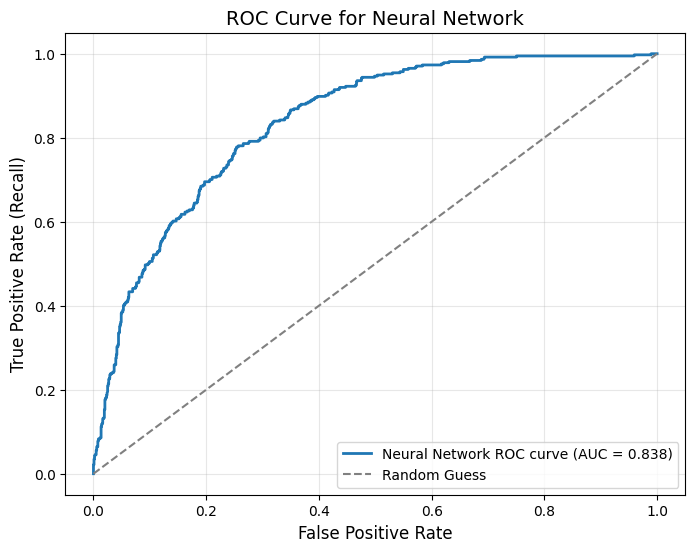

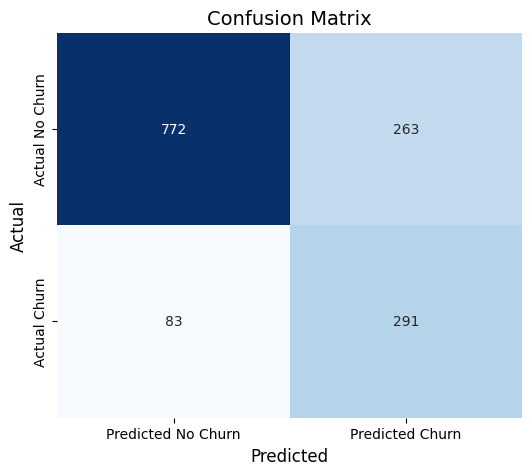

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Neural Network ROC curve (AUC = {roc_auc:.3f})',linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess', color='gray')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('ROC Curve for Neural Network', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(loc='lower right')
plt.savefig('/content/drive/MyDrive/ML_Coursework/ROC_NN.png')
plt.show()

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_optimal)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Predicted No Churn","Predicted Churn"],
            yticklabels=["Actual No Churn","Actual Churn"])
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.savefig('/content/drive/MyDrive/ML_Coursework/confusion_matrix_NN.png')
plt.show()